<h3>Housing_Sale_Price_Prediction_</h3>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from scipy.stats import norm
from scipy import stats

path = '/Users/afnity_computer/Desktop/AI_teaching/'

df = pd.read_csv(path + 'house_train.csv')

In [2]:
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


<h3>Analyzing Sales Price</h3>

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It seems that minimum price is $34900, and Max Price is 755000. We don't see the minimum values with zero price. Its a good sign that there are no missing values in the sales price variable

<b>Histogram</b>

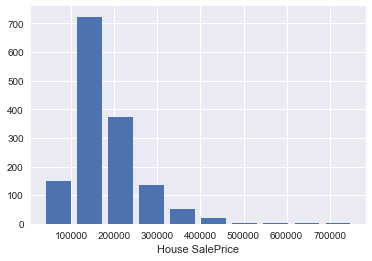

In [50]:
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'], histtype='bar',  rwidth=0.8)
plt.xlabel("House SalePrice")
plt.show()

It seems that data has been skewed and it is a positive skewness. 

<h3>Correlation</h3>

Correlation refers to the strength and the direction of the relationship between two quantitative features. A Correlation value of 1 is strong correlation in the positive direction, where as a correlation value of -1 means a strong correlation in the negative direction. A Value of zero means no correlation between the quantitative features

<b>Relationship with Numerical Variables</b>

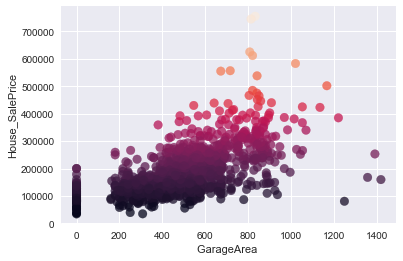

In [51]:
x = df['GarageArea']
y = df['SalePrice']
plt.scatter(x, y, s=75, c=y, alpha=0.75)
plt.xlabel('GarageArea ')
plt.ylabel('House_SalePrice')
plt.show()

It seems to be that garage area and Housing_Sales price are linearly correlated. and it's a positive correlation

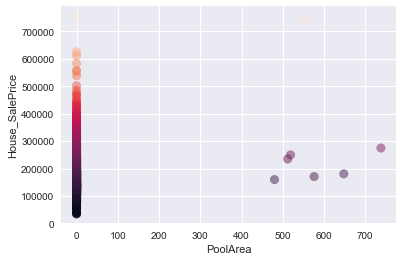

In [52]:
#sales price vs Lot Area
x = df['PoolArea']
y = df['SalePrice']
plt.scatter(x, y, s=75, c=y, alpha=0.5)
plt.xlabel('PoolArea')
plt.ylabel('House_SalePrice')

plt.show()

It seems most of the houses doesnt have any pool area and this variable doenot explain any relationship with the Sales Price

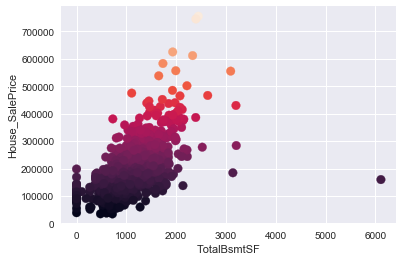

In [53]:
#sales price vs TotalBsmtSF
x = df['TotalBsmtSF']
y = df['SalePrice']
plt.scatter(x, y, s=75, c=y, alpha=1)
plt.xlabel('TotalBsmtSF')
plt.ylabel('House_SalePrice')

plt.show()

It seems like there is a strong correlation with TotalBasmtSF and Housing_Sales Price. Incase if TotalBsmtSF is zero, the sales prices is very close to zero

<h3>Relationship with categorical features</h3>

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.<br>

Outliers may be plotted as individual points

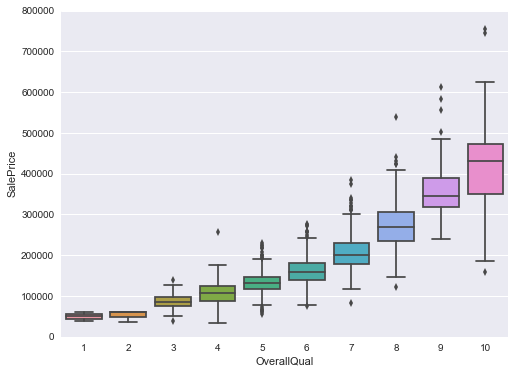

In [54]:
#House_price vs Over_all_Quality
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)


f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

In this case if the Overall Quality of the house is 10, then the minimum house price is close to $200,000. 50 percentail of the House prices are in the range between $200,000 - $450,000

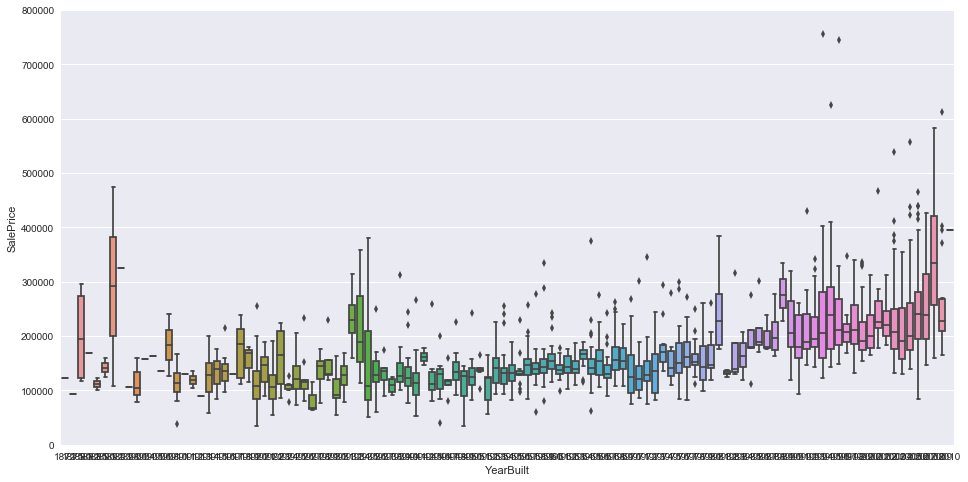

In [55]:
#House Price vs YearBuilt
var = 'YearBuilt'

data = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

<h3>In Summary</h3>

1. GrLivArea and TotalBsmtSF seems to be linearly related with sales price. Both the relationships are positive which means that as one variable increases other also increases

2. The relationship between overall quality and years built seems to be stronger, box plot displays how the sales increase with overall quality

<h3>Correlation matrix</h3>

Till now we applied the Intutive analysis over the important variales, that we thought it is important. Now we can similar analysis for all the variables to check correlation with sales price

1. Correlation Matrix(Heat Map)
2. Zoomed Style Correlation Matrix
3. Scatter Plot Matrix

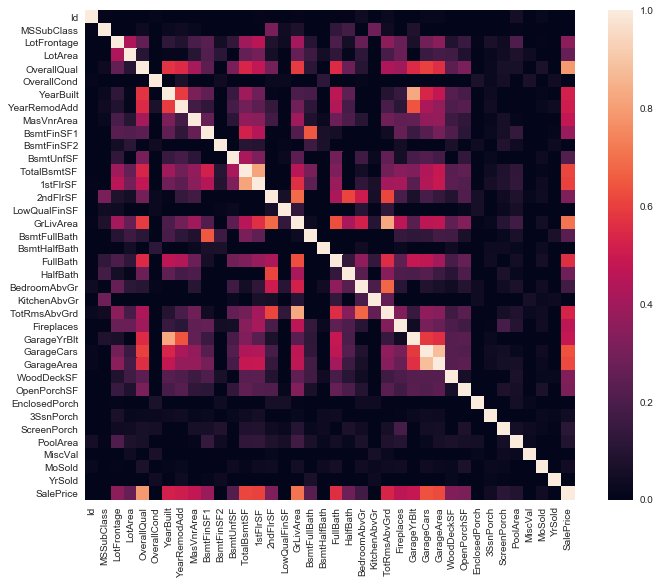

In [56]:
#Corelation Matrix
corrmat = df.corr()
#print(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
#control the positive and negative correlation with vmin, vmax
sns.heatmap(corrmat, vmin=0, vmax =1, square=True)
plt.show()

<h3>SalePrice' correlation matrix (zoomed heatmap style)</h3>

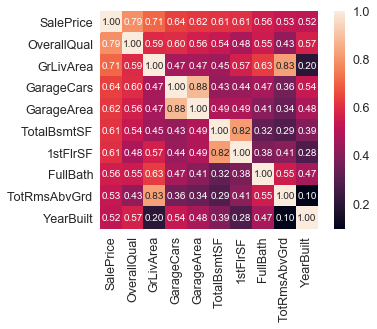

In [57]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'.<br>
'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'<br>
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.<br>
'TotRmsAbvGrd' and 'GrLivArea' are also some of the most strongly correlated variables.<br>
'TotalBasmtSF' and '1stFlrSF' also highly correlated<br>
'YearBuilt' slightly correlated with Sale Prce <br>

<h3>Scatter Plot between Sales Price and Correlated variables</h3>

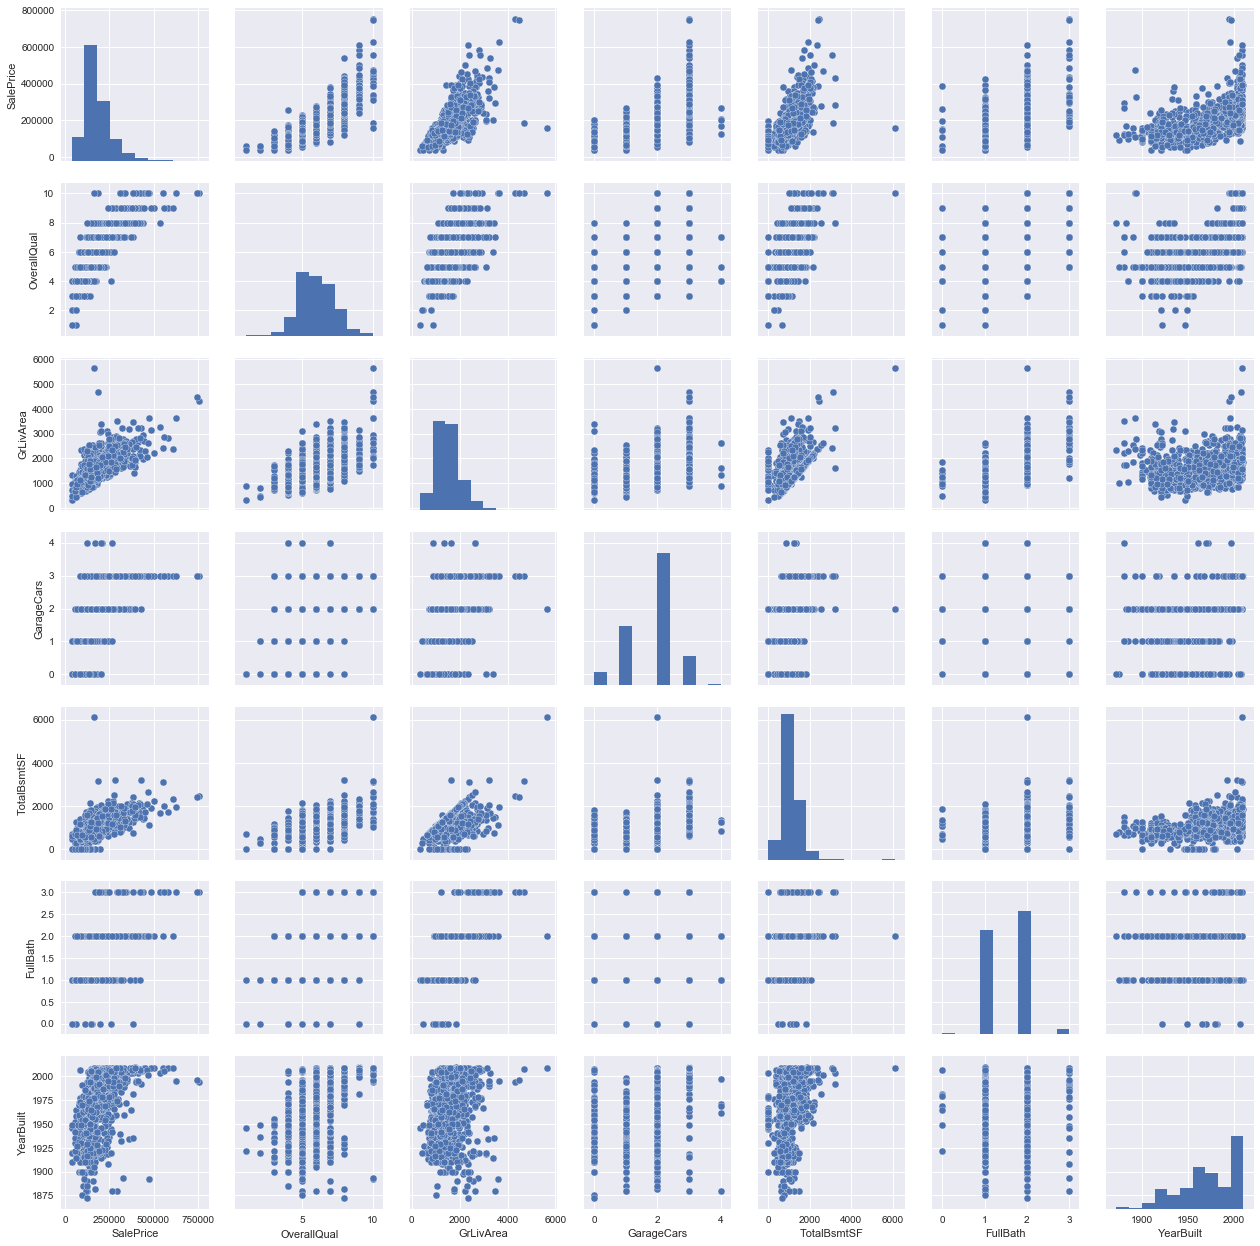

In [58]:
#scatterplot

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', \
        'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size=2.5)
plt.show()


TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area

<h3>Handling Missing Values</h3>

The missing data can imply a reduction of the sample size. There are three main problems that missing data causes: 

1. missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency.

2. Because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values

In [59]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [60]:
df_clean = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', \
         'LotFrontage', 'GarageCond', 'GarageType', 'GarageType', \
        'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',\
        'MasVnrArea', 'MasVnrType', 'Electrical', 'GarageYrBlt', 'GarageFinish', \
                  'GarageQual' ], 1)

In [61]:
total_missing = df_clean.isnull().sum().sort_values(ascending=False)
print(total_missing)

SalePrice        0
OverallQual      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
HouseStyle       0
SaleCondition    0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
MSSubClass       0
                ..
HeatingQC        0
CentralAir       0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageArea       0
GarageCars       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath    

<h3>Normality</h3>

Normality, is that data should be a normally distributed. 

/Users/afnity_computer/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


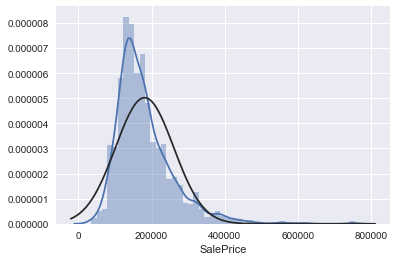

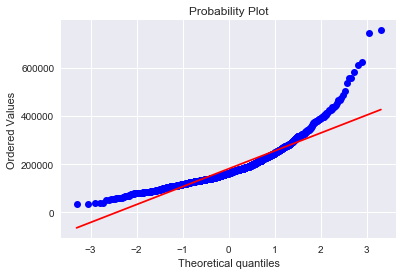

In [62]:
import seaborn as sns

sns.distplot(df_clean['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_clean['SalePrice'], plot=plt)
plt.show()

In [20]:
#applying log transformation

Hence the Data is positively skewed, so we can apply log function to convert a skewed data into a normal distribution

In [63]:
df_clean['SalePrice'] = np.log(df_clean['SalePrice'])

/Users/afnity_computer/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


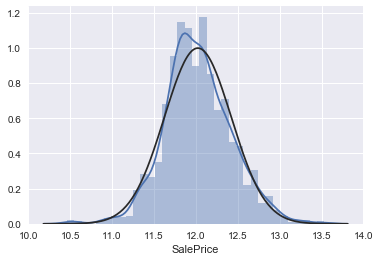

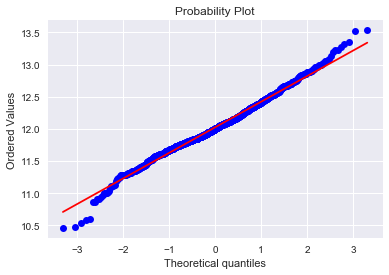

In [64]:
sns.distplot(df_clean['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_clean['SalePrice'], plot=plt)
plt.show()

<h3>Handling Dummy Variables</h3>

Dummy Variables are the one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome

In [65]:
df_clean_final = pd.get_dummies(df_clean)

In [66]:
df_clean_final.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


<h3>Data Modeling</h3>

The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

The training data must contain the correct answer, which is known as a target or target attribute. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.

## Regression
Regression is a form of predictive modeling technique which investigates the relationship between a dependent and independent variables. This technique is used for forecasting, time series modeling and cause and effect relationship between variables. For example, relationship between rash driving and number of road accidents by a driver is best studied through regression.

<h3>Why do We use Regression Analysis</h3>

Regression analysis estimates the relationship between two or more variables

Let’s say, you want to estimate growth in sales of a company based on current economic conditions. You have the recent company data which indicates that the growth in sales is around two and a half times the growth in the economy. Using this insight, we can predict future sales of the company based on current & past information.


<h3>Types of Regression</h3>

There are various kinds of regression techniques available to make predictions. These techniques are mostly driven by three metrics (number of independent variables, type of dependent variables and shape of regression line). 

<img src='linear_reg.png'/img width=400 >

<h3>Linear Regression</h3>

Linear Regression establish a relationship between dependent variable(Y) and One or More Independent Variable(s) using best fit straight line(also known as regression line)

It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

<img src='regresion.png' /img width=600>

<h3>R2- Root Mean Square Evaluation Metrics</h3>

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that error are unbiased and follow a normal distribution. Here are the key points to consider on RMSE:

<img src=r2_error.png /img width=400>

The difference between simple linear regression and multiple linear regression is that, multiple linear regression has (>1) independent variables, whereas simple linear regression has only 1 independent variable.  Now, the question is “How do we obtain best fit line?

<h3>How to Obtain a best fit line(Value of A and B)</h3>

calculates the best-fit line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line. Because the deviations are first squared, when added, there is no cancelling out between positive and negative values.

<h3>Important Points</h3>

1. There must be linear relationship between independent and dependent variables
2. Multiple regression suffers from multicollinearity, autocorrelation.
3. Linear Regression is very sensitive to Outliers. It can terribly affect the regression line and eventually the forecasted values.
4. Multicollinearity can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. The result is that the coefficient estimates are unstable
5. In case of multiple independent variables, we can go with forward selection, backward elimination and step wise approach for selection of most significant independent variables.


<h3>Linear Regression to predict Boston Housing Price</h3>

Import all the required modules from Sklearn to split the algorithm with Training and Testing sample and Call the Linear Regression Module from sikit learn dataset

In [69]:
#linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Dropping the Label Variable and Keeping only Features
#SalePrice - Dependent or Label Variable

X = df_clean_final.drop(['SalePrice'], 1)
y = df_clean_final['SalePrice']

#Splitting the Features and Labels for Training and Testing
#We are Splitting the Training size and Testing size with 80:20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Calling the LinearRegression Function
regr = LinearRegression()

#.fit train the model
clf = regr.fit(x_train, y_train)

#y=mx+c = co-efficients for each and every features

<h3>Model Evaluation with R2</h3>

In [70]:
clf_score = clf.score(x_test, y_test)
print(clf_score)

0.89084734461


<b>Model Prediction</b>

clf contains all the co-efficients belongs to the trained model. So lets predict our dataset by using testing sample to predict the House Sale Price

In [71]:
clf_predict = clf.predict(x_test)

In [72]:
print(clf_predict[:5])
print(y_test[:5])

[ 11.81590107  12.03768688  11.61620004  12.03699186  12.14514138]
150     11.711776
944     11.831379
1072    11.424094
1124    12.007012
28      12.242887
Name: SalePrice, dtype: float64


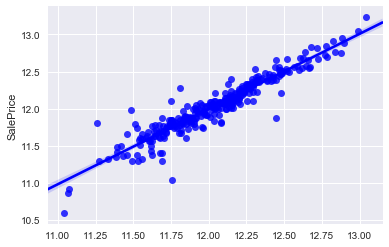

In [73]:
#ploting a reg graph with sns
rg = sns.regplot(clf_predict, y_test, color='blue')
plt.show()

This Graph indicates that all the predicted datapoints are very close to the bestfit line.

<h3>Concatenating the Predicted sales price with Testing Dataset</h3>

In [74]:
clf_predict_price = pd.DataFrame(clf_predict)
x_test_result = pd.DataFrame(x_test)
x_test_result.head()
x_test_result["true_sales_price"] = y_test
x_test_result["predicted_sales_price"] = clf_predict_price


In [75]:
x_test_result.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,true_sales_price,predicted_sales_price
150,151,20,10356,5,6,1975,1975,716,0,253,...,0,1,0,0,0,0,1,0,11.711776,12.150905
944,945,20,14375,6,6,1958,1958,111,354,354,...,0,0,1,0,0,0,0,0,11.831379,NaN
1072,1073,50,7585,5,3,1948,1950,0,0,810,...,0,1,0,0,0,0,1,0,11.424094,NaN
1124,1125,80,9125,7,5,1992,1992,0,0,384,...,0,1,0,0,0,0,1,0,12.007012,NaN
28,29,20,16321,5,6,1957,1997,1277,0,207,...,0,1,0,0,0,0,1,0,12.242887,12.881900


<b>Saving the Prediction results into a Testing Dataset</b>

In [76]:
x_test_result.to_csv("Housing_price_prediction_liner_reg.csv")

<h3>Implementing Non-Linear Regression on this Model</h3>

<h3>Tuning the Model with Gradient Boosting Regression</h3>

Boosting is a Non-Linear flexible regression technique that helps increase accuracy of trees by assigning more weights to wrong prediction. The reason for inducing more weights is so the model can emphasize more on these wrongly predicted samples and tune itself to increase accuracy. 

<img src='gradient_boost.png' /img width='400'>

In [77]:
from sklearn.ensemble import GradientBoostingRegressor


#Dropping the Label Variable and Keeping only Features
#SalePrice - Dependent or Label Variable

X = df_clean_final.drop(['SalePrice'], 1)
y = df_clean_final['SalePrice']

#Splitting the Features and Labels for Training and Testing
#We are Splitting the Training size and Testing size with 80:20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



model = GradientBoostingRegressor()
clf = model.fit(x_train, y_train)
clf_score = clf.score(x_test, y_test)
print(clf_score)


0.905875360979


The Model Accuracy is 91%. It means outof 100 houses the model can able to predict only 91 house prices accurately. So we can see the error of 9%, so improve the accuracy of the model we can implement multiple methods like

1. Dropping the Correlated Variables
2. Handling the Outliers
3. Preprocessing the Data
4. Gradient Boosting

TO handle the Correlation we decided to run the Single Gradient Boosting on all the Highly correlated variables. The features with high r2 will be retained in the model and others will be dropped from the model

In [78]:
feature = df_clean['OverallQual']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

#Reshape the Variable Incase of only 1 feature
x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.669821906688


While looking at R2 co-efficient for the 'OverallQual' is 65.7%

In [79]:
feature = df_clean['GrLivArea']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.536712232438


While looking at R2 co-efficient for the 'GrLivArea' is 37.8% pretty bad

In [80]:
feature = df_clean['TotalBsmtSF']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.410815470569


While looking at R2 co-efficient for the 'TotalBsmtSF' is 36.6%

In [81]:
feature = df_clean['GarageCars']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.462685618744


While looking at R2 co-efficient for the 'GarageCars' is 48.8%

In [82]:
feature = df_clean['GarageArea']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.496605330383


While looking at R2 co-efficient for the 'GarageArea' is 35.2%

In [83]:
feature = df_clean['TotRmsAbvGrd']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.29780435246


While looking at R2 co-efficient for the 'TotRmsAbvGrd' is 25.6%

In [84]:
feature = df_clean['1stFlrSF']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.445793396502


In [85]:
feature = df_clean['YearBuilt']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.2)

x_train_s = x_train_s.values.reshape(-1, 1)
x_test_s = x_test_s.values.reshape(-1, 1)


clf = model.fit(x_train_s, y_train_s)
clf_score = clf.score(x_test_s, y_test_s)
print(clf_score)

0.48146391571


Lets Drop all the highly Corelated Variables that are having lesserthan 40% of R2 with Target Variable Sale Price



In [86]:

from sklearn.model_selection import train_test_split

#Total BasementSF is highly Correlated with 1stFlrSF, so onbehalf driping
#both the Variables we are dropping 1stFlrSF due to relss predictive power 
#over the Sales Price

X = df_clean_final.drop(['SalePrice', \
                        'TotRmsAbvGrd', \
                        ], 1)
y = df_clean_final['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [87]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
clf = model.fit(x_train, y_train)
clf_score = clf.score(x_test, y_test)
print(clf_score)

0.859956088271


After treating the Corelated variables the R2 value fall down. Actually In this case doesn't make sense of droping a Correlated variables. Lets Handle the ouliers and check model performence

<h3>Handling Outliers</h3>

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature (or each sample, depending on the axis argument) by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [88]:
from sklearn.preprocessing import RobustScaler

#Transforming the variables with RobustScaling
out_robust = RobustScaler()
X = out_robust.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
#from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
clf = model.fit(x_train, y_train)
clf_score = clf.score(x_test, y_test)
print(clf_score)

0.89505618785


In [90]:
#Model Prediction
clf_predict_nl_reg = clf.predict(x_test)
print(clf_predict_nl_reg[:5])
print(y_test[:5])

[ 12.27690078  12.13829374  11.91242736  11.82549475  12.29608038]
726     12.310433
1210    12.149502
1085    11.898188
239     11.635143
337     12.273731
Name: SalePrice, dtype: float64


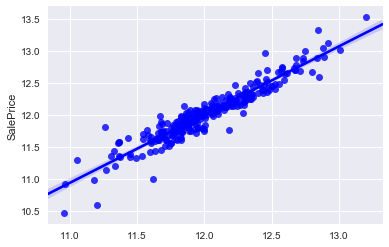

In [91]:
#ploting a reg graph with sns
rg = sns.regplot(clf_predict_nl_reg, y_test, color='blue')
plt.show()

<h3>Summary</h3>

1. We Implemented both Linear and Non-Liner Regression(Gradient Boosting Regression) on the Dataset
2. Bothe the Regression are giving the similar resilts
3. To handle the Correlation, we applied Gradient Boosting Regression on all the highly correlated variable and droped the variables that has less R2
4. To Treat the Outliers we implemented RobustScaling Preprocessing technique. 
5. Now you can test any of the new hosing price dataset with simalr features to predict the House Pricing Sales 
